In [5]:
import numpy as np
import pandas as pd 

# set para
#stn_latlon = {"47105": [37.7515, 128.891]}
stn_latlon = {'875': [38.1211, 128.4606]}

print(stn_latlon.items())
print(len(stn_latlon))

stn_id = list(stn_latlon.items())[0][0]
print(type(stn_id), stn_id)

dict_items([('875', [38.1211, 128.4606])])
1
<class 'str'> 875


In [6]:
#import openpyxl
import pandas as pd
import numpy as np

# .. OBS Data load
#read_dir = "D:\KMK_DATA\OBS\HOURLY\\"
read_dir = "../DATA/obs/"
read_list = [
    f"{stn_id}_OBS_ASOS_TIM_20210101_20211231.csv",
    f"{stn_id}_OBS_ASOS_TIM_20220101_20221231.csv",
    f"{stn_id}_OBS_ASOS_TIM_20230101_20230630.csv"
]
set_col = ['지점', '지점명', '일시', '풍속(m/s)', '풍향(16방위)']

df1 = pd.DataFrame()
for file in read_list:
    read_file = read_dir + file
    #print(read_file)
    df = pd.read_csv(read_file, encoding='cp949')
    df1 = pd.concat([df1, df], axis=0, ignore_index=True)

if stn_id == '875': 
    df1.columns = ['지점', '지점명', '일시', '풍향(16방위)', '풍속(m/s)']
df1 = df1[set_col]
df1['일시'] = pd.to_datetime(df1['일시'])
print(df1)




        지점  지점명                  일시  풍속(m/s)  풍향(16방위)
0      875  설악산 2021-01-01 00:00:00      2.9     276.0
1      875  설악산 2021-01-01 01:00:00      3.1     244.6
2      875  설악산 2021-01-01 02:00:00      3.3     259.2
3      875  설악산 2021-01-01 03:00:00      3.1     263.3
4      875  설악산 2021-01-01 04:00:00      2.8     267.4
...    ...  ...                 ...      ...       ...
20532  875  설악산 2023-06-30 19:00:00      2.1      63.0
20533  875  설악산 2023-06-30 20:00:00      0.7     239.1
20534  875  설악산 2023-06-30 21:00:00      0.4       0.0
20535  875  설악산 2023-06-30 22:00:00      0.5      77.0
20536  875  설악산 2023-06-30 23:00:00      3.4      38.4

[20537 rows x 5 columns]


In [7]:
df1.info() 
df1.tail()

# 10개 nan 있고, 2개 결측 있음 
# 2021.01.01.00 ~ 2023.06.30.23.00(실제 n=)
# 데이타: n=21859

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20537 entries, 0 to 20536
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   지점        20537 non-null  int64         
 1   지점명       20537 non-null  object        
 2   일시        20537 non-null  datetime64[ns]
 3   풍속(m/s)   20537 non-null  float64       
 4   풍향(16방위)  20537 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 802.4+ KB


,지점,지점명,일시,풍속(m/s),풍향(16방위)
20532,875,설악산,2023-06-30 19:00:00,2.1,63.0
20533,875,설악산,2023-06-30 20:00:00,0.7,239.1
20534,875,설악산,2023-06-30 21:00:00,0.4,0.0
20535,875,설악산,2023-06-30 22:00:00,0.5,77.0
20536,875,설악산,2023-06-30 23:00:00,3.4,38.4


In [8]:
from metpy.calc import wind_components
from metpy.units import units

#df['새로운변수'] = df.apply(lambda x: sample_function(x.변수1, x.변수2, ...), axis = 1)

def wind_to_uv(spd, dir):
    a = wind_components(spd * units('m/s'), dir * units.deg)
    return np.array(a[0]),np.array(a[1])

u_list, v_list = [], []
for i in range(df1.shape[0]):
    u, v = wind_to_uv(df1['풍속(m/s)'][i], df1['풍향(16방위)'][i])
    u_list.append(u)
    v_list.append(v)
#u, v = wind_to_uv(df1['풍속(m/s)'], df1['풍향(16방위)'])
print("ulist len: ", len(u_list))
#u.shape
df1['U_comp.'] = np.round(u_list, 2)
df1['V_comp.'] = np.round(v_list, 2)

df1 = df1.set_index('일시')
print(df1.loc['2022-05-31 09:00:00'])

ulist len:  20537
지점           875
지점명          설악산
풍속(m/s)      1.5
풍향(16방위)    49.8
U_comp.    -1.15
V_comp.    -0.97
Name: 2022-05-31 09:00:00, dtype: object


In [9]:
print(df1.info())
print(df1.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20537 entries, 2021-01-01 00:00:00 to 2023-06-30 23:00:00
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   지점        20537 non-null  int64  
 1   지점명       20537 non-null  object 
 2   풍속(m/s)   20537 non-null  float64
 3   풍향(16방위)  20537 non-null  float64
 4   U_comp.   20537 non-null  float64
 5   V_comp.   20537 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 1.6+ MB
None
지점          0
지점명         0
풍속(m/s)     0
풍향(16방위)    0
U_comp.     0
V_comp.     0
dtype: int64


In [10]:
# 결측치의 index 번호 찾기
mask = df1['U_comp.'].isnull()
index_list = df1.index[mask]

print(index_list)

#print(df1.index)
# with open('./print_dates.txt', 'w', encoding='cp949') as f:
#     for i in df1.index:
#         print(i, file=f)

DatetimeIndex([], dtype='datetime64[ns]', name='일시', freq=None)


In [7]:
#df1.loc['2022-03-19 09:00:00']
#df1.loc['2021-10-27 01:00:00'] # 결측 NaN, 진짜 없음 결측
#df1.loc['2021-12-31 02:00:00']

### df1 plot

<Axes: >

C:\Users\tjoeun\AppData\Roaming\Python\Python39\site-packages\IPython\core\events.py:93: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\tjoeun\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


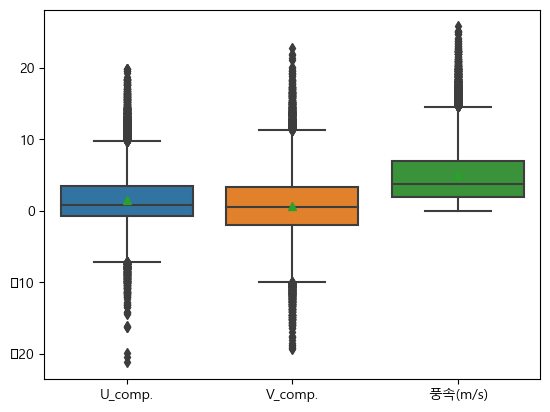

In [11]:
# .. u,v kde plot
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
# .. u,v box plot
import matplotlib.pyplot as plt
import seaborn as sns
#df1.boxplot(column=['U_comp.','V_comp.'])

sns.boxplot(data=df1[['U_comp.','V_comp.','풍속(m/s)']], showmeans=True)

In [9]:
#df1.columns = ['stn_id', 'stn_name', 'spd', 'dir', "U", "V"]
#df1.head()

C:\Users\tjoeun\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


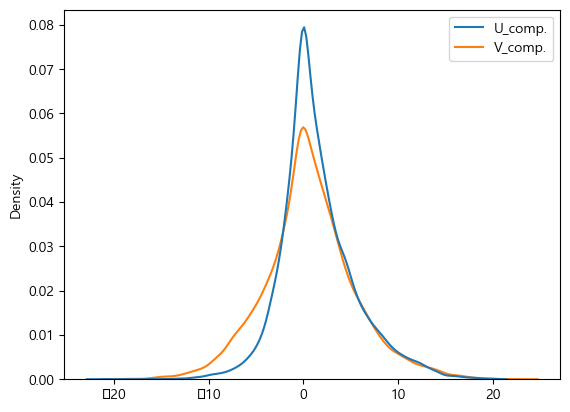

In [12]:
sns.kdeplot(df1[['U_comp.','V_comp.']])
plt.show()


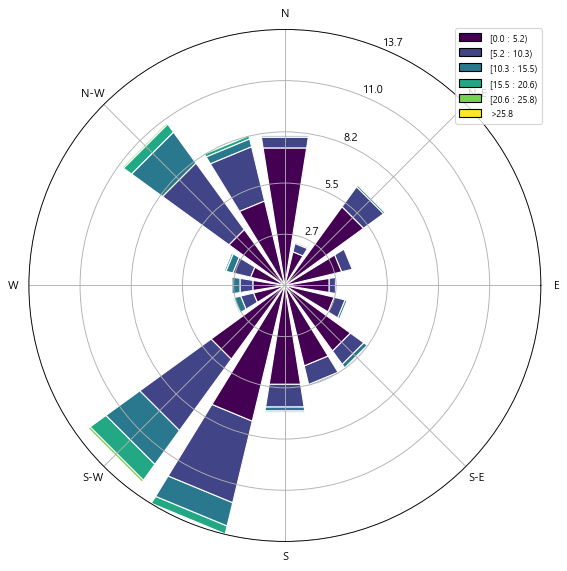

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data

# Create the windrose plot
from windrose import WindroseAxes
ax = WindroseAxes.from_ax()
ax.bar(df1['풍향(16방위)'], df1['풍속(m/s)'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend(loc="best")

### 훈련용 obs_dat 추출

In [14]:
# .. extract date
#data_dates = pd.date_range('2021-01-01 00:00:00', '2023-06-30 23:00:00', freq='H')
set_dates = pd.date_range('2021-01-14 09:00:00', '2023-05-31 09:00:00', freq='D')
#print("data day수: ", len(data_dates))
print("있어야할 day수: ", len(set_dates))


# rdates = pd.date_range('2022-03-19 09:00:00', periods=48, freq='H')
# print('1111', set_dates[0:2])


# make (batch, sequence=48, feature=[u,v])
obs_data = np.full( (len(set_dates),49,2), np.nan )

for key, value in stn_latlon.items(): 

   for i,day in enumerate(set_dates):
      rdates = pd.date_range(day, periods=49, freq='H')
      if(len(set_dates)-1==i): print(rdates)
      try:
         for j, rdate in enumerate(rdates):
            obs_data[i,j,0] = df1.loc[rdate,'U_comp.']
            obs_data[i,j,1] = df1.loc[rdate,'V_comp.']
      except Exception as e:
         print("error: ", e)  # nan으로 있지도 않은 자료

   with open(f'../DAIO/obs_data_{key}', 'wb') as f:
      np.save(f, obs_data)


있어야할 day수:  868
error:  Timestamp('2021-01-30 15:00:00')
error:  Timestamp('2021-01-30 15:00:00')
error:  Timestamp('2021-01-31 09:00:00')
error:  Timestamp('2021-02-01 10:00:00')
error:  Timestamp('2021-02-15 14:00:00')
error:  Timestamp('2021-02-15 14:00:00')
error:  Timestamp('2021-03-06 19:00:00')
error:  Timestamp('2021-03-06 19:00:00')
error:  Timestamp('2021-03-07 09:00:00')
error:  Timestamp('2021-03-11 18:00:00')
error:  Timestamp('2021-03-11 18:00:00')
error:  Timestamp('2021-03-12 09:00:00')
error:  Timestamp('2021-03-13 09:00:00')
error:  Timestamp('2021-03-14 09:00:00')
error:  Timestamp('2021-03-15 09:00:00')
error:  Timestamp('2021-03-16 09:00:00')
error:  Timestamp('2021-03-17 09:00:00')
error:  Timestamp('2021-03-18 09:00:00')
error:  Timestamp('2021-03-19 09:00:00')
error:  Timestamp('2021-03-20 09:00:00')
error:  Timestamp('2021-03-21 09:00:00')
error:  Timestamp('2021-03-22 09:00:00')
error:  Timestamp('2021-03-23 09:00:00')
error:  Timestamp('2021-04-10 04:00:00')



#### 데이터 확인

In [15]:
#import pandas as pd
rdates = pd.date_range('2023-05-31 09:00:00', periods=49, freq='H')
#print(rdates)
test_spd = df1.loc[rdates,'풍속(m/s)']
test_dir = df1.loc[rdates,'풍향(16방위)']


print(df1.loc['2023-05-31 09:00:00'])
#print(rdates)

지점            875
지점명           설악산
풍속(m/s)       4.8
풍향(16방위)    214.3
U_comp.       2.7
V_comp.      3.97
Name: 2023-05-31 09:00:00, dtype: object


In [16]:
# np.array 결측 제거 테스트
# a = np.array([[1,2,3],[4,5,6],[7,8,np.nan]])
# print(a.shape)
# mask = np.isnan(a).any(axis=0)
# b = a[~mask]
# print(b.shape)


# 변환값 체크
from metpy.calc import wind_speed, wind_direction
print(obs_data.shape)


# 원래 파일에도 없는 index때문에 배열 꼬인듯, 고치기
for i, (u, v) in enumerate(obs_data[-1,:,:]):
    spd = np.array(np.round(wind_speed(u* units('m/s'), v* units('m/s')), 2))
    dir = np.array(np.round(wind_direction(u* units('m/s'),v* units('m/s')), 0))
    print(i, spd, test_spd[i], dir, test_dir[i], sep=',  ' )


(868, 49, 2)
0,  4.8,  4.8,  214.0,  214.3
1,  3.9,  3.9,  212.0,  212.2
2,  3.7,  3.7,  215.0,  214.6
3,  3.6,  3.6,  199.0,  199.5
4,  4.1,  4.1,  205.0,  205.0
5,  3.3,  3.3,  201.0,  200.9
6,  3.3,  3.3,  201.0,  201.1
7,  2.7,  2.7,  200.0,  200.2
8,  3.99,  4.0,  214.0,  214.3
9,  5.5,  5.5,  214.0,  213.6
10,  5.2,  5.2,  227.0,  227.5
11,  7.4,  7.4,  211.0,  211.1
12,  7.4,  7.4,  222.0,  221.6
13,  10.0,  10.0,  223.0,  222.7
14,  8.0,  8.0,  222.0,  222.1
15,  8.5,  8.5,  218.0,  217.7
16,  11.7,  11.7,  221.0,  221.4
17,  13.6,  13.6,  220.0,  219.8
18,  12.4,  12.4,  220.0,  219.7
19,  10.31,  10.3,  220.0,  219.6
20,  8.1,  8.1,  212.0,  212.0
21,  8.3,  8.3,  211.0,  210.8
22,  7.5,  7.5,  191.0,  191.3
23,  4.4,  4.4,  147.0,  146.8
24,  2.39,  2.4,  200.0,  200.1
25,  3.21,  3.2,  221.0,  220.7
26,  5.9,  5.9,  223.0,  222.9
27,  5.2,  5.2,  225.0,  225.3
28,  5.5,  5.5,  218.0,  218.2
29,  5.9,  5.9,  205.0,  205.3
30,  4.9,  4.9,  214.0,  213.6
31,  6.9,  6.9,  199.0

In [17]:
# np.array 결측 제거 테스트
# a = np.array([[[1,2,3],[4,5,6],[7,8,np.nan]],
#               [[1,2,3],[4,5,6],[7,8,np.nan]]])
# print(a.shape)
# mask = np.isnan(a).any(axis=2)
# print(mask)
# print(mask.shape)
#b = a[~mask]
#print(b.shape)


print("obs shape: ", obs_data.shape)
mask = pd.DataFrame(np.isnan(obs_data[:,:,:]).any(axis=1))
print(mask.shape)
print("결측셋 개수", mask.value_counts())
index = set(np.where(np.isnan(obs_data))[0])
print(sorted(index))

print(set_dates[sorted(index)])


obs shape:  (868, 49, 2)
(868, 2)
결측셋 개수 0      1    
False  False    757
True   True     111
Name: count, dtype: int64
[15, 16, 17, 18, 31, 32, 50, 51, 52, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 84, 85, 86, 87, 123, 124, 198, 199, 258, 259, 272, 273, 277, 278, 279, 280, 287, 288, 305, 306, 427, 428, 429, 430, 431, 432, 453, 454, 455, 456, 469, 470, 517, 518, 519, 524, 525, 527, 528, 532, 533, 534, 535, 536, 537, 538, 539, 540, 607, 608, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 667, 668, 669, 704, 705, 729, 730, 731, 732, 758, 759, 760, 761, 762, 763, 764]
DatetimeIndex(['2021-01-29 09:00:00', '2021-01-30 09:00:00',
               '2021-01-31 09:00:00', '2021-02-01 09:00:00',
               '2021-02-14 09:00:00', '2021-02-15 09:00:00',
               '2021-03-05 09:00:00', '2021-03-06 09:00:00',
               '2021-03-07 09:00:00', '2021-03-10 09:00:00',
               ...
               '2023-01-14 